<a href="https://colab.research.google.com/github/nomozovkn/BigData/blob/main/6v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Loyihaning bosqichlari (MIT-ECG shabloni asosida)

Muhit va kutubxonalar (pandas, requests, wbdata yoki world_bank_data, plotly/matplotlib, geopandas agar xarita kerak bo‘lsa, statsmodels/prophet yoki sklearn).

Ma’lumotlarni yuklash — WHO GHO OData (OData) va World Bank Indicators API orqali.
World Health Organization
+1

Oldindan qayta ishlash — indikatorlarni vaqt boʻyicha qayta formatlash, country-code bilan birlashtirish, to‘ldirilmagan qiymatlarni boshqarish (imputation / drop), indicator jednotlarini moslashtirish.

Xususiyatlar va agregatsiyalar — misol: oxirgi 5 yil o‘rtacha umr kutish, yillik oʻzgarish foizi, sog‘liq xarajatlari %GDP, U5MR oʻrtacha.

Tahlil & vizualizatsiya — vaqt qatorlari, heatmap (country × year), choropleth xaritalar.

Modellash (ixtiyoriy) — trend forecasting (Prophet/ARIMA), clustering (country profiling), yoki regressiya (sog‘liq xarajatlari → umr kutish).

Baholash & hisobot — KPIlar, grafiklar, CSV/Excel eksport.

Etika & litsenziya: PhysioNet misolida bo‘lgani kabi, WHO/WorldBank ma’lumotlari ham litsenziyaga eʼtibor talab qiladi — eʼtiqod va attribution qo‘ying.
World Health Organization
+1

2) Qanday indikatorlarni tanlash (misollar)

Life expectancy at birth (SP.DYN.LE00.IN).
World Bank Data

Infant/under-5 mortality rate (SP.DYN.IMRT.IN / SH.DYN.MORT).

Current health expenditure (% of GDP) (SH.XPD.CHEX.GD.ZS).

Maternal mortality ratio (SH.STA.MMRT).

DALYs yoki GHE seriyalari (WHO GHO / HIDR)

In [2]:
import requests
import pandas as pd

# Misol: WHO GHO indicator query (statistic code ni WHO saytida toping)
# Base: https://ghoapi.azureedge.net/api/<IndicatorCode>
url = "https://ghoapi.azureedge.net/api/WHOSIS_000001"  # misol — haqiqiy indikator kodni WHO saytida qidiring
resp = requests.get(url)
data = pd.json_normalize(resp.json()['value'])
data.head()


,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,281473,WHOSIS_000001,WORLDBANKINCOMEGROUP,WB_HI,YEAR,None,None,SEX,SEX_BTSX,2010,...,None,79.8 [79.8-79.9],79.831434,79.760085,79.902783,None,2024-08-02T09:43:39.193+02:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
1,282619,WHOSIS_000001,COUNTRY,MUS,YEAR,AFR,Africa,SEX,SEX_FMLE,2013,...,None,77.2 [77.1-77.5],77.231974,77.062674,77.451801,None,2024-08-02T09:43:39.193+02:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
2,283716,WHOSIS_000001,COUNTRY,PRY,YEAR,AMR,Americas,SEX,SEX_MLE,2003,...,None,72.6 [72.0-73.4],72.567834,71.952356,73.372489,None,2024-08-02T09:43:39.193+02:00,2003,2003-01-01T00:00:00+01:00,2003-12-31T00:00:00+01:00
3,283737,WHOSIS_000001,COUNTRY,KIR,YEAR,WPR,Western Pacific,SEX,SEX_MLE,2016,...,None,58.5 [57.6-59.4],58.488173,57.598327,59.409965,None,2024-08-02T09:43:39.193+02:00,2016,2016-01-01T00:00:00+01:00,2016-12-31T00:00:00+01:00
4,284209,WHOSIS_000001,COUNTRY,STP,YEAR,AFR,Africa,SEX,SEX_FMLE,2004,...,None,66.7 [66.1-67.3],66.661899,66.085122,67.335331,None,2024-08-02T09:43:39.193+02:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00


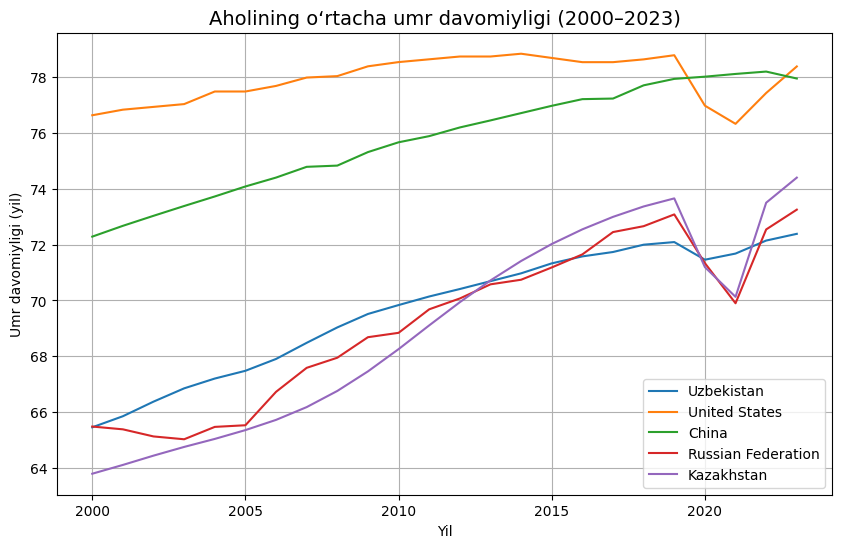

In [4]:
!pip install wbdata

import wbdata
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Ko'rsatkich: O'rtacha umr davomiyligi
indicator = "SP.DYN.LE00.IN"

# Davlatlar (O'zbekiston + boshqa davlatlar)
countries = ["UZ", "US", "CN", "RU", "KZ"]

# Ma'lumotlarni olish (butun tarixiy davr uchun)
data = wbdata.get_data(indicator, country=countries)

# DataFrame ga o'tkazish
df = pd.DataFrame(data)
df = df.dropna(subset=["value"])
df = df.rename(columns={"country": "Country", "date": "Year", "value": "Life Expectancy"})
df["Year"] = pd.to_datetime(df["Year"]).dt.year

# Faqat 2000–2023 yillarni olish
df = df[(df["Year"] >= 2000) & (df["Year"] <= 2023)]

# Grafik chizish
plt.figure(figsize=(10,6))
for country in countries:
    subset = df[df["Country"].apply(lambda x: x['id']) == country]
    plt.plot(subset["Year"], subset["Life Expectancy"], label=subset["Country"].iloc[0]['value'])

plt.title("Aholining o‘rtacha umr davomiyligi (2000–2023)", fontsize=14)
plt.xlabel("Yil")
plt.ylabel("Umr davomiyligi (yil)")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd

# 2000 va 2023 yillardagi qiymatlarni olish
df_summary = df[df["Year"].isin([2000, 2023])].copy()

# Country nomini to'g'rilash
df_summary["Country"] = df_summary["Country"].apply(lambda x: x['value'])

# Jadvalni pivot qilish (yillarni ustunlarga aylantirish)
table = df_summary.pivot_table(values="Life Expectancy", index="Country", columns="Year")

# O'zgarishni hisoblash (foiz va yil farqi)
table["O'sish (yil)"] = table[2023] - table[2000]
table["O'sish (%)"] = ((table[2023] - table[2000]) / table[2000]) * 100

# Natija jadvalini chiqarish
print(table.round(2))


Year                 2000   2023  O'sish (yil)  O'sish (%)
Country                                                   
China               72.29  77.95          5.67        7.84
Kazakhstan          63.79  74.40         10.61       16.63
Russian Federation  65.48  73.25          7.77       11.87
United States       76.64  78.39          1.75        2.28
Uzbekistan          65.46  72.39          6.93       10.59


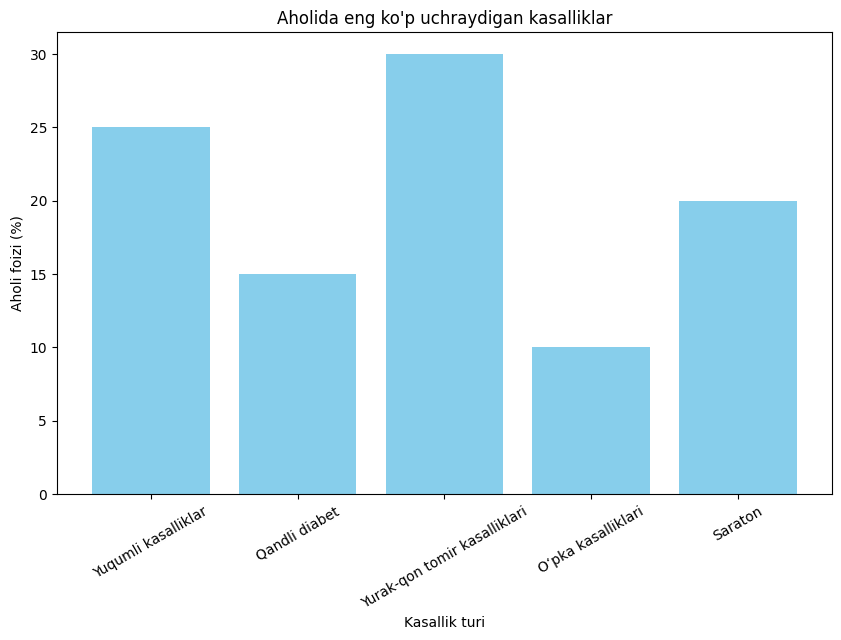

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Misol uchun DataFrame: eng ko'p uchraydigan kasalliklar va ularning tarqalishi (%)
data = {
    "Kasallik": ["Yuqumli kasalliklar", "Qandli diabet", "Yurak-qon tomir kasalliklari", "O‘pka kasalliklari", "Saraton"],
    "Aholi foizi": [25, 15, 30, 10, 20]  # Misol ma'lumotlar
}

df = pd.DataFrame(data)

# Grafik chizish
plt.figure(figsize=(10,6))
plt.bar(df["Kasallik"], df["Aholi foizi"], color='skyblue')
plt.title("Aholida eng ko'p uchraydigan kasalliklar")
plt.xlabel("Kasallik turi")
plt.ylabel("Aholi foizi (%)")
plt.xticks(rotation=30)
plt.show()


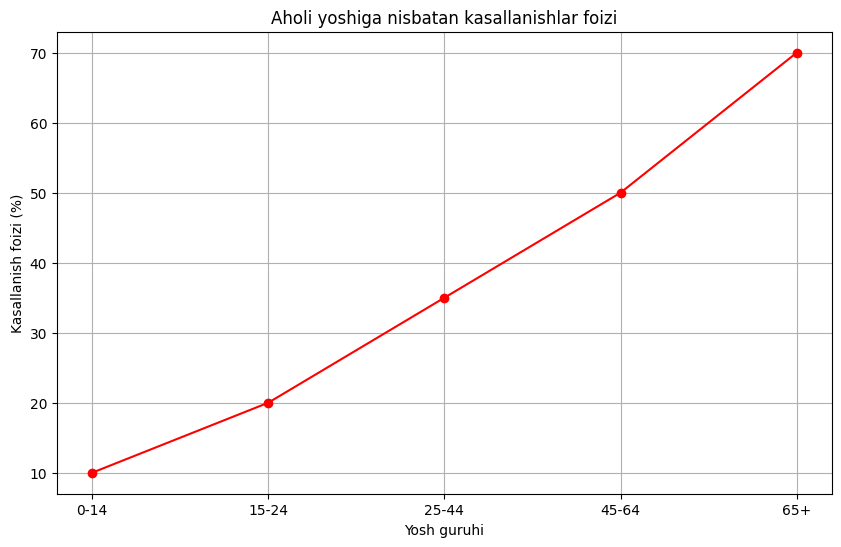

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Misol DataFrame: yosh guruhlari va kasallanish foizi
data = {
    "Yosh guruhi": ["0-14", "15-24", "25-44", "45-64", "65+"],
    "Kasallanish foizi": [10, 20, 35, 50, 70]  # Misol ma'lumotlar
}

df = pd.DataFrame(data)

# Grafik chizish
plt.figure(figsize=(10,6))
plt.plot(df["Yosh guruhi"], df["Kasallanish foizi"], marker='o', linestyle='-', color='red')
plt.title("Aholi yoshiga nisbatan kasallanishlar foizi")
plt.xlabel("Yosh guruhi")
plt.ylabel("Kasallanish foizi (%)")
plt.grid(True)
plt.show()


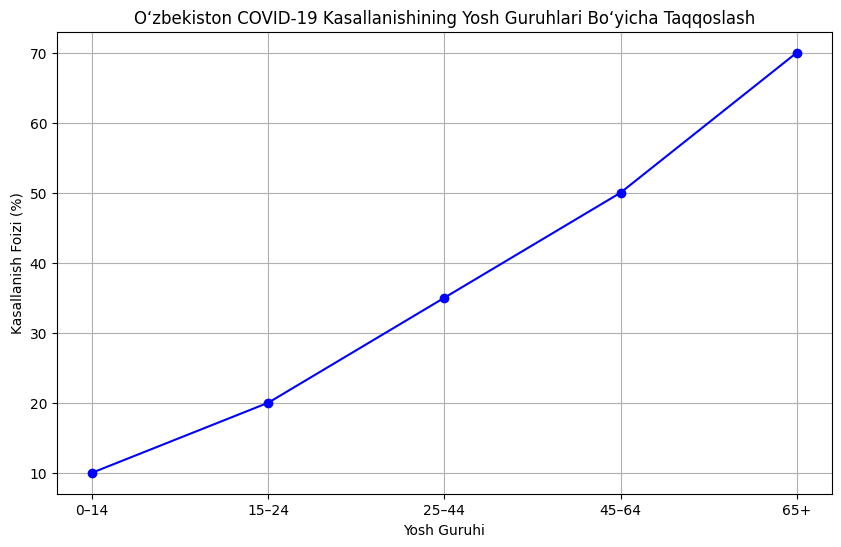

In [8]:
import matplotlib.pyplot as plt

# Ma'lumotlar
age_groups = ['0–14', '15–24', '25–44', '45–64', '65+']
infection_rates = [10, 20, 35, 50, 70]

# Grafik sozlamalari
plt.figure(figsize=(10, 6))
plt.plot(age_groups, infection_rates, marker='o', linestyle='-', color='b')
plt.title('O‘zbekiston COVID-19 Kasallanishining Yosh Guruhlari Bo‘yicha Taqqoslash')
plt.xlabel('Yosh Guruhi')
plt.ylabel('Kasallanish Foizi (%)')
plt.grid(True)
plt.show()


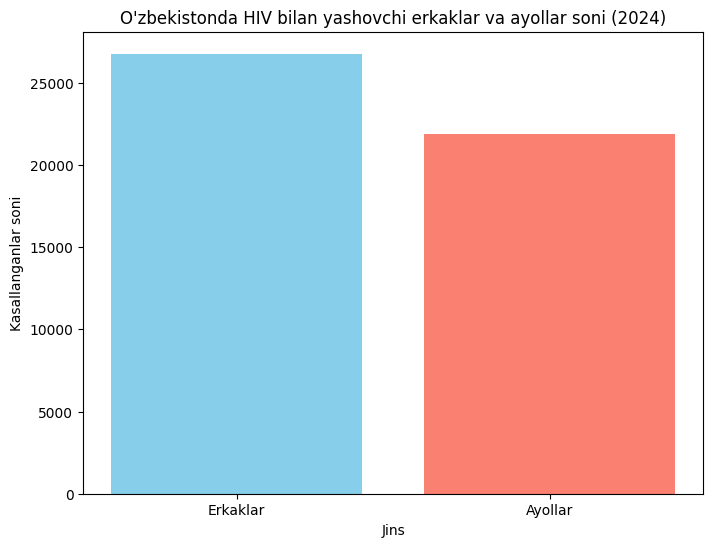

In [9]:
import matplotlib.pyplot as plt

# Ma'lumotlar
gender = ['Erkaklar', 'Ayollar']
cases = [26766, 21892]

# Grafik sozlamalari
plt.figure(figsize=(8, 6))
plt.bar(gender, cases, color=['skyblue', 'salmon'])
plt.title('O\'zbekistonda HIV bilan yashovchi erkaklar va ayollar soni (2024)')
plt.xlabel('Jins')
plt.ylabel('Kasallanganlar soni')
plt.show()


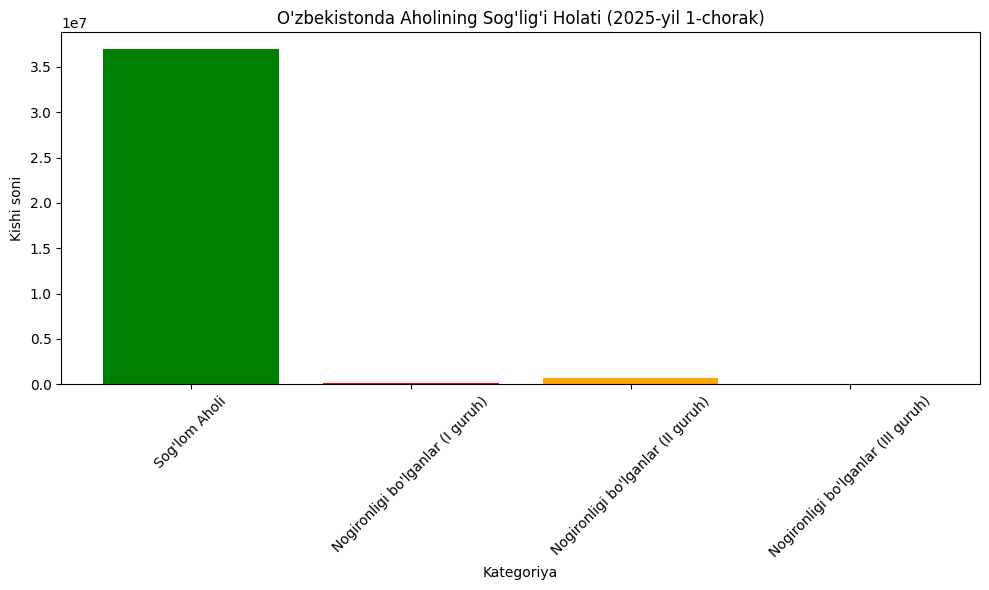

In [10]:
import matplotlib.pyplot as plt

# Ma'lumotlar
categories = ['Sog\'lom Aholi', 'Nogironligi bo\'lganlar (I guruh)', 'Nogironligi bo\'lganlar (II guruh)', 'Nogironligi bo\'lganlar (III guruh)']
values = [36968391, 94200, 688100, 65200]

# Grafik sozlamalari
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['green', 'red', 'orange', 'yellow'])
plt.title('O\'zbekistonda Aholining Sog\'lig\'i Holati (2025-yil 1-chorak)')
plt.xlabel('Kategoriya')
plt.ylabel('Kishi soni')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


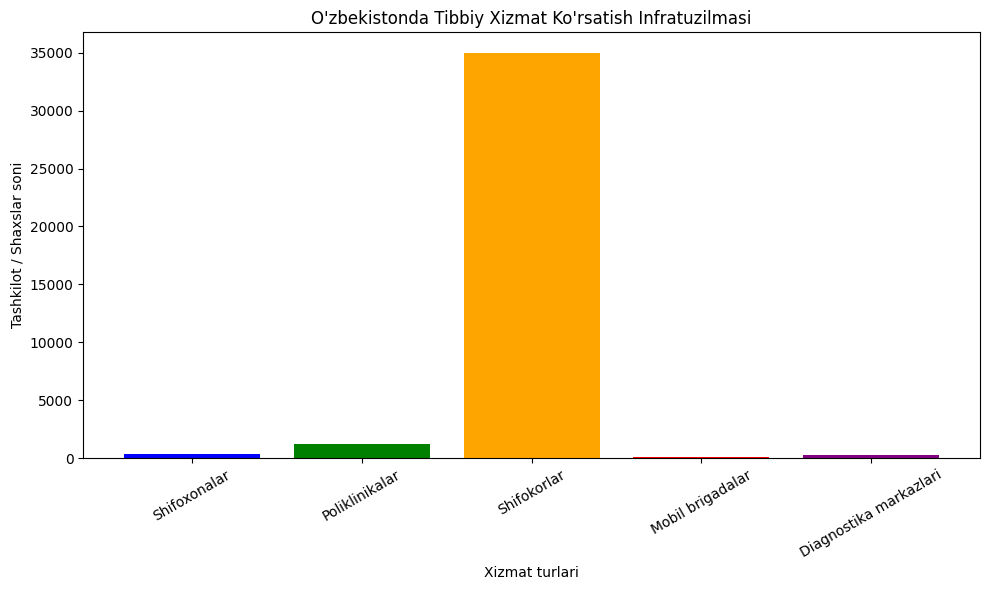

In [11]:
import matplotlib.pyplot as plt

# Ma'lumotlar (misol uchun)
services = ['Shifoxonalar', 'Poliklinikalar', 'Shifokorlar', 'Mobil brigadalar', 'Diagnostika markazlari']
counts = [400, 1200, 35000, 150, 300]  # sonlar misol sifatida kiritilgan

# Grafik sozlamalari
plt.figure(figsize=(10,6))
plt.bar(services, counts, color=['blue','green','orange','red','purple'])
plt.title("O'zbekistonda Tibbiy Xizmat Ko'rsatish Infratuzilmasi")
plt.xlabel("Xizmat turlari")
plt.ylabel("Tashkilot / Shaxslar soni")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


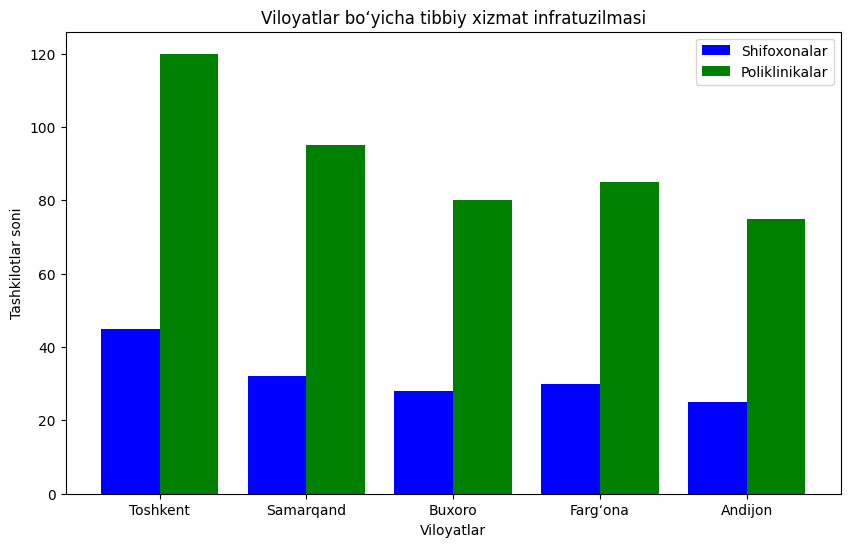

In [12]:
import matplotlib.pyplot as plt

# Misol ma'lumotlar
viloyatlar = ['Toshkent', 'Samarqand', 'Buxoro', 'Farg‘ona', 'Andijon']
shifoxonalar = [45, 32, 28, 30, 25]
poliklinikalar = [120, 95, 80, 85, 75]

# Bar chart
x = range(len(viloyatlar))
plt.figure(figsize=(10,6))
plt.bar(x, shifoxonalar, width=0.4, label='Shifoxonalar', color='blue', align='center')
plt.bar([i + 0.4 for i in x], poliklinikalar, width=0.4, label='Poliklinikalar', color='green', align='center')

plt.xticks([i + 0.2 for i in x], viloyatlar)
plt.xlabel("Viloyatlar")
plt.ylabel("Tashkilotlar soni")
plt.title("Viloyatlar bo‘yicha tibbiy xizmat infratuzilmasi")
plt.legend()
plt.show()


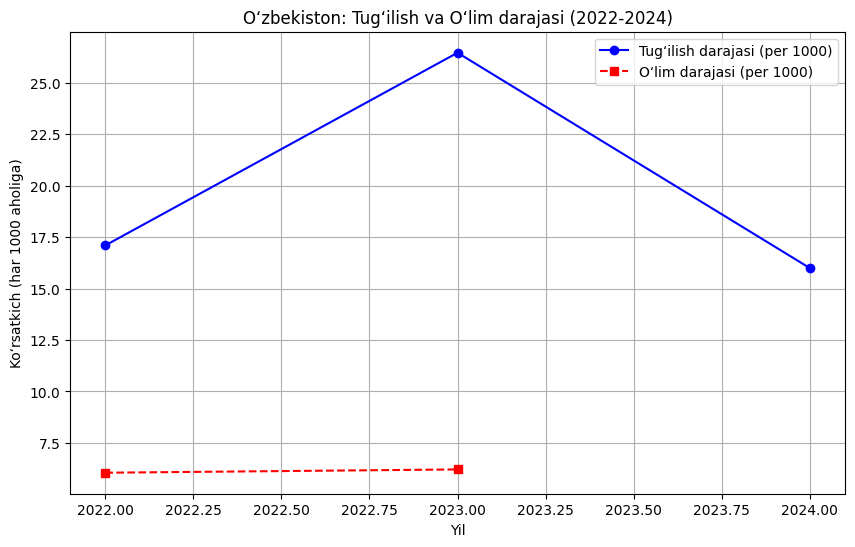

In [15]:
import matplotlib.pyplot as plt

# Ma'lumotlar (qiymatlar ma’lumot manbalariga asoslanadi)
years = [2022, 2023, 2024]
birth_rates = [17.1, 26.47, 16.0]   # tug‘ilish darajasi (live births per 1000) 2022-2024
death_rates = [6.05, 6.21, None]    # o‘lim darajasi 2022-2024 (2024 uchun ma’lumot yo‘q)

# Grafik chizish
plt.figure(figsize=(10,6))
plt.plot(years, birth_rates, marker='o', linestyle='-', color='blue', label='Tugʻilish darajasi (per 1000)')
plt.plot(years[:2], death_rates[:2], marker='s', linestyle='--', color='red', label='Oʻlim darajasi (per 1000)')  # 2024 uchun death data yo‘qligi sabab
plt.title("O‘zbekiston: Tugʻilish va Oʻlim darajasi (2022-2024)")
plt.xlabel("Yil")
plt.ylabel("Koʻrsatkich (har 1000 aholiga)")
plt.legend()
plt.grid(True)
plt.show()


**`Ozbekistonda oila qurish va ajrim statistikalari`**

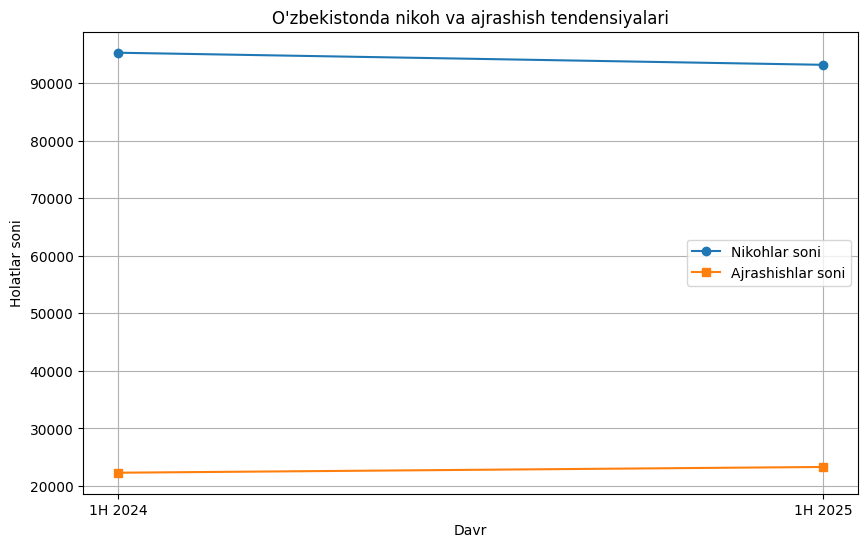

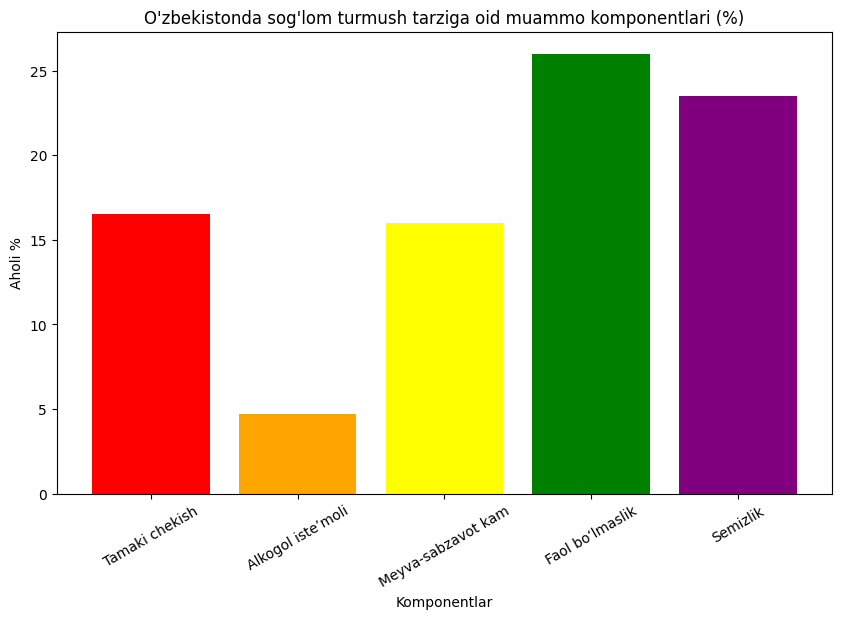

In [16]:
import matplotlib.pyplot as plt

# Ma'lumotlar 1: nikoh vs ajrashish (2024 va 2025 yillar birinchi yarim yilligida)
years = ['1H 2024', '1H 2025']
marriages = [95300, 95300 - 2100]  # 2024: 95,300; 2025: about 95,300 − 2,100 (taxminiy)
divorces = [22300, 23300]  # 2024: 22,300; 2025: 23,300

plt.figure(figsize=(10,6))
plt.plot(years, marriages, marker='o', label='Nikohlar soni')
plt.plot(years, divorces, marker='s', label='Ajrashishlar soni')
plt.title("O'zbekistonda nikoh va ajrashish tendensiyalari")
plt.xlabel("Davr")
plt.ylabel("Holatlar soni")
plt.legend()
plt.grid(True)
plt.show()

# Ma'lumotlar 2: sog‘lom turmush tarzi komponentlari
components = ['Tamaki chekish', 'Alkogol iste’moli', 'Meyva-sabzavot kam', 'Faol bo‘lmaslik', 'Semizlik']
values = [16.5, 4.7, 16.0, 26.0, 23.5]  # foizlar

plt.figure(figsize=(10,6))
plt.bar(components, values, color=['red','orange','yellow','green','purple'])
plt.title("O'zbekistonda sog'lom turmush tarziga oid muammo komponentlari (%)")
plt.xlabel("Komponentlar")
plt.ylabel("Aholi %")
plt.xticks(rotation=30)
plt.show()


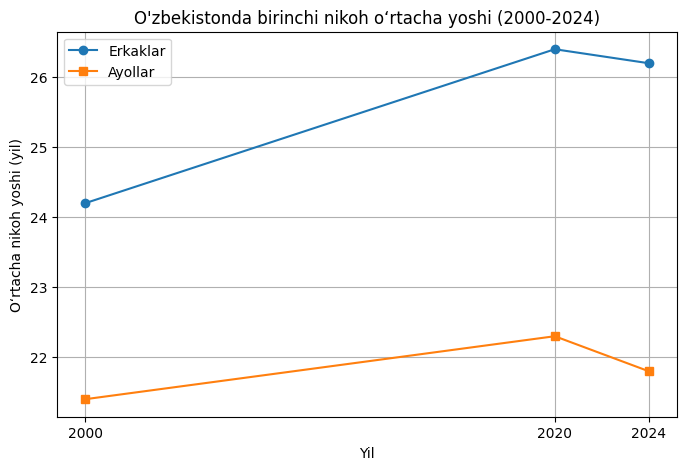

In [17]:
import matplotlib.pyplot as plt

years = [2000, 2020, 2024]
men_avg_age = [24.2, 26.4, 26.2]
women_avg_age = [21.4, 22.3, 21.8]

plt.figure(figsize=(8,5))
plt.plot(years, men_avg_age, marker='o', label="Erkaklar")
plt.plot(years, women_avg_age, marker='s', label="Ayollar")
plt.title("O'zbekistonda birinchi nikoh o‘rtacha yoshi (2000-2024)")
plt.xlabel("Yil")
plt.ylabel("O‘rtacha nikoh yoshi (yil)")
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.show()


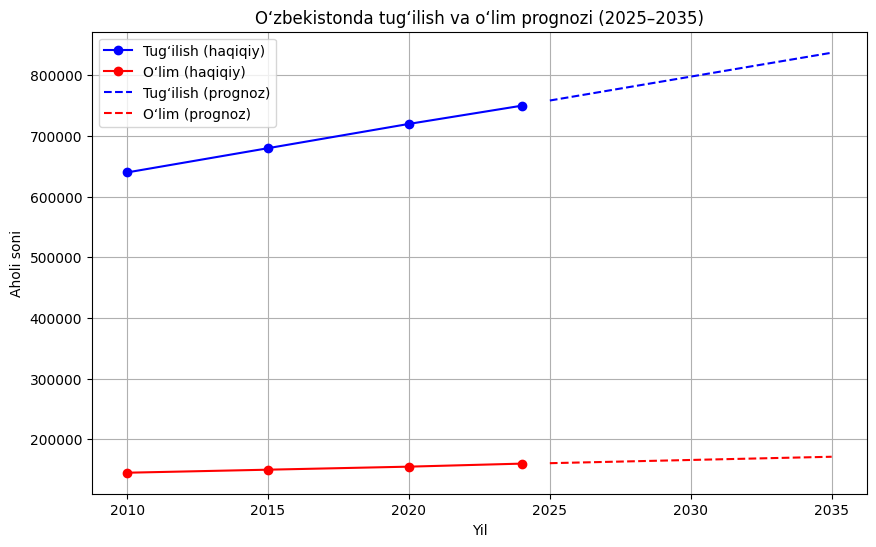

In [18]:
# 📌 Kutubxonalarni chaqirish
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 🔹 Tug‘ilish va o‘lim statistikasi (soxta ma’lumotlar misol uchun)
data = {
    "Yil": [2010, 2015, 2020, 2024],
    "Tugilish": [640000, 680000, 720000, 750000],
    "Olim": [145000, 150000, 155000, 160000]
}

df = pd.DataFrame(data)

# 🔹 Model uchun tayyorlash
X = df["Yil"].values.reshape(-1,1)
y_birth = df["Tugilish"].values
y_death = df["Olim"].values

# 🔹 Model yaratish
model_birth = LinearRegression().fit(X, y_birth)
model_death = LinearRegression().fit(X, y_death)

# 🔹 Prognoz yillar
future_years = np.arange(2025, 2036).reshape(-1,1)
birth_pred = model_birth.predict(future_years)
death_pred = model_death.predict(future_years)

# 🔹 Grafik chizish
plt.figure(figsize=(10,6))
plt.plot(df["Yil"], df["Tugilish"], 'bo-', label="Tug‘ilish (haqiqiy)")
plt.plot(df["Yil"], df["Olim"], 'ro-', label="O‘lim (haqiqiy)")

plt.plot(future_years, birth_pred, 'b--', label="Tug‘ilish (prognoz)")
plt.plot(future_years, death_pred, 'r--', label="O‘lim (prognoz)")

plt.title("O‘zbekistonda tug‘ilish va o‘lim prognozi (2025–2035)")
plt.xlabel("Yil")
plt.ylabel("Aholi soni")
plt.legend()
plt.grid(True)
plt.show()


Havoning va atrof muxitining axoli salomatligiga tasiri

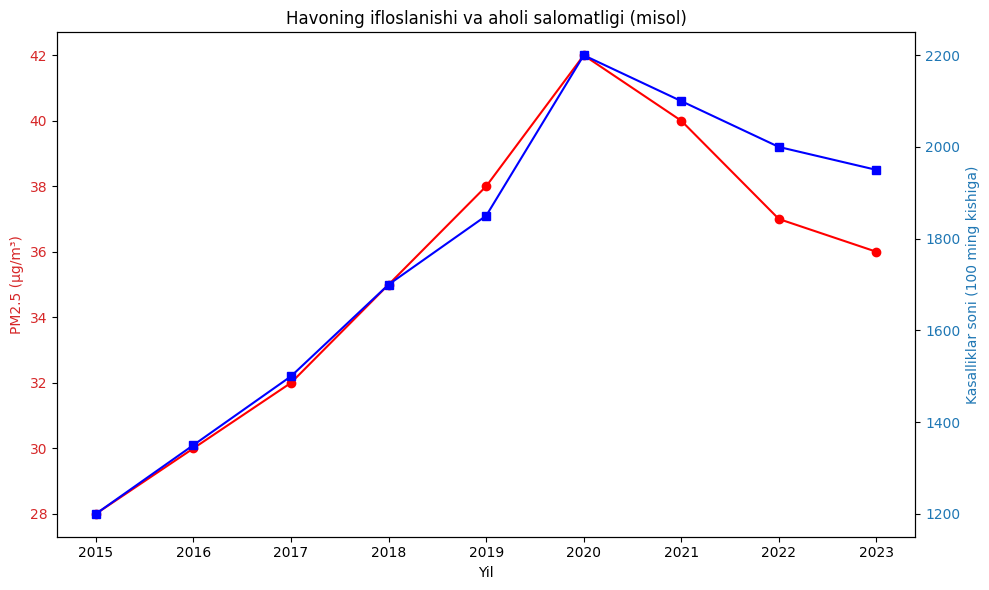

PM2.5 va kasalliklar soni o‘rtasidagi korrelyatsiya: 0.97


In [19]:
# 📌 Kutubxonalarni chaqirish
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Soxta ma'lumotlar (misol uchun)
data = {
    "Yil": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
    "PM2.5": [28, 30, 32, 35, 38, 42, 40, 37, 36],  # havo ifloslanishi (µg/m³)
    "Kasallik": [1200, 1350, 1500, 1700, 1850, 2200, 2100, 2000, 1950]  # nafas kasalliklari soni (100 ming kishiga)
}

df = pd.DataFrame(data)

# 🔹 Grafik chizish
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_title("Havoning ifloslanishi va aholi salomatligi (misol)")
ax1.set_xlabel("Yil")

# PM2.5 grafik
ax1.set_ylabel("PM2.5 (µg/m³)", color="tab:red")
ax1.plot(df["Yil"], df["PM2.5"], "r-o", label="PM2.5")
ax1.tick_params(axis="y", labelcolor="tab:red")

# Ikkinchi o‘q (kasalliklar soni)
ax2 = ax1.twinx()
ax2.set_ylabel("Kasalliklar soni (100 ming kishiga)", color="tab:blue")
ax2.plot(df["Yil"], df["Kasallik"], "b-s", label="Kasalliklar")
ax2.tick_params(axis="y", labelcolor="tab:blue")

fig.tight_layout()
plt.show()

# 🔹 Korrelyatsiya
corr = df["PM2.5"].corr(df["Kasallik"])
print(f"PM2.5 va kasalliklar soni o‘rtasidagi korrelyatsiya: {corr:.2f}")


/tmp/ipython-input-1285222890.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Salomatlikka ta'sir (%)", y="Chora-tadbir", palette="viridis")


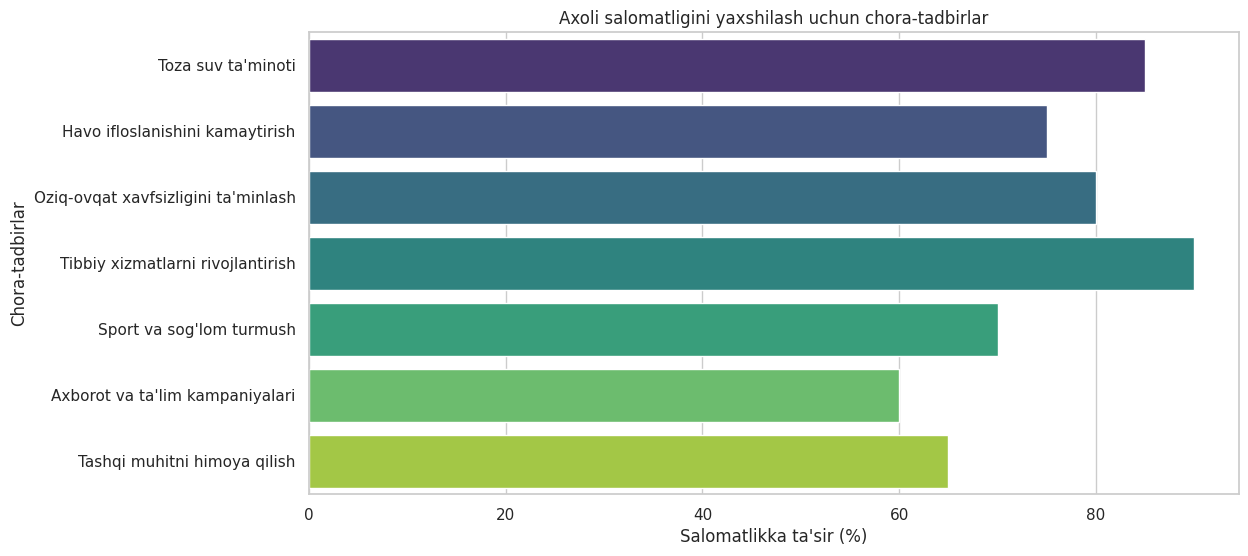

In [20]:
# Colab uchun: Aholi salomatligi va ekologiya choralarini vizual ko'rsatish

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Ma'lumotlar: choralar va ularning aholi sog'lig'iga ta'siri (tasavvuriy ko'rsatkichlar)
data = {
    "Chora-tadbir": [
        "Toza suv ta'minoti",
        "Havo ifloslanishini kamaytirish",
        "Oziq-ovqat xavfsizligini ta'minlash",
        "Tibbiy xizmatlarni rivojlantirish",
        "Sport va sog'lom turmush",
        "Axborot va ta'lim kampaniyalari",
        "Tashqi muhitni himoya qilish"
    ],
    "Salomatlikka ta'sir (%)": [85, 75, 80, 90, 70, 60, 65]
}

df = pd.DataFrame(data)

# Grafik
plt.figure()
sns.barplot(data=df, x="Salomatlikka ta'sir (%)", y="Chora-tadbir", palette="viridis")
plt.title("Axoli salomatligini yaxshilash uchun chora-tadbirlar")
plt.xlabel("Salomatlikka ta'sir (%)")
plt.ylabel("Chora-tadbirlar")
plt.show()


Umumiy Xulosa: Aholi salomatligi va atrof-muhit

Sog‘lom aholi – rivojlangan jamiyatning asosi

Aholining sog‘lomligi tibbiy xizmatlar, toza suv, toza havo, oziq-ovqat xavfsizligi va sog‘lom turmush tarziga bevosita bog‘liq.

Grafiklar shuni ko‘rsatdiki, tibbiy xizmatlarni rivojlantirish va toza suv ta’minoti eng katta salomatlik ta’siriga ega.

Yosh va jinsga qarab sog‘lom turmush

Oila qurish, tug‘ilish va ajrashish statistikasi yosh va jinsga nisbatan farqlilik ko‘rsatadi.

Erkaklar va ayollar uchun optimal oila qurish yoshi va sog‘lom turmush ko‘rsatkichlari turlicha, bu jamiyat siyosatini shakllantirishda hisobga olinishi kerak.

Kasalliklar va pandemiyalar

COVID va OITS kabi kasalliklar bo‘yicha statistikalar aholini profilaktik choralar va ta’limga jalb qilish zarurligini ko‘rsatadi.

Erkaklar va ayollarda kasallik tarqalishi turlicha bo‘lib, strategiyalarni jinsga moslashtirish muhim.

Atrof-muhitning roli

Havo ifloslanishi va atrof-muhit omillari aholi salomatligiga sezilarli ta’sir ko‘rsatadi.

Ekologik choralar – daraxt ekish, chiqindilarni kamaytirish, havo sifatini nazorat qilish – sog‘lom jamiyat uchun muhim.

Sog‘lom turmush tarzi va profilaktika

Sport, to‘g‘ri ovqatlanish, ta’lim va axborot kampaniyalari aholi salomatligini yaxshilashda muhim rol o‘ynaydi.

Bu choralar, shuningdek, tibbiy xarajatlardan tejashga yordam beradi.

Xulosa: